                    🏦 BANKING FRAUD DETECTION DASHBOARD 🏦
               Banking Fraud Detection and Risk Analytics in India
                         Trends, Patterns & Insights


  🔐 MySQL Database Connection Setup


Enter MySQL Host [localhost]:  
Enter MySQL Username [root]:  
Enter MySQL Password:  ········
Enter Database Name [banking_fraud_db]:  



🔌 Connecting to MySQL database...
✅ Successfully connected to banking_fraud_db database!
📊 Fetching data from database...
✅ Data fetched successfully!

📈 Generating comprehensive dashboard with 8 KPIs + 14 Visualizations...
   ✓ ALL 8 KPIs NOW PROPERLY DISPLAYED IN 2 ROWS!
✅ Dashboard saved as 'banking_fraud_dashboard_complete.png'


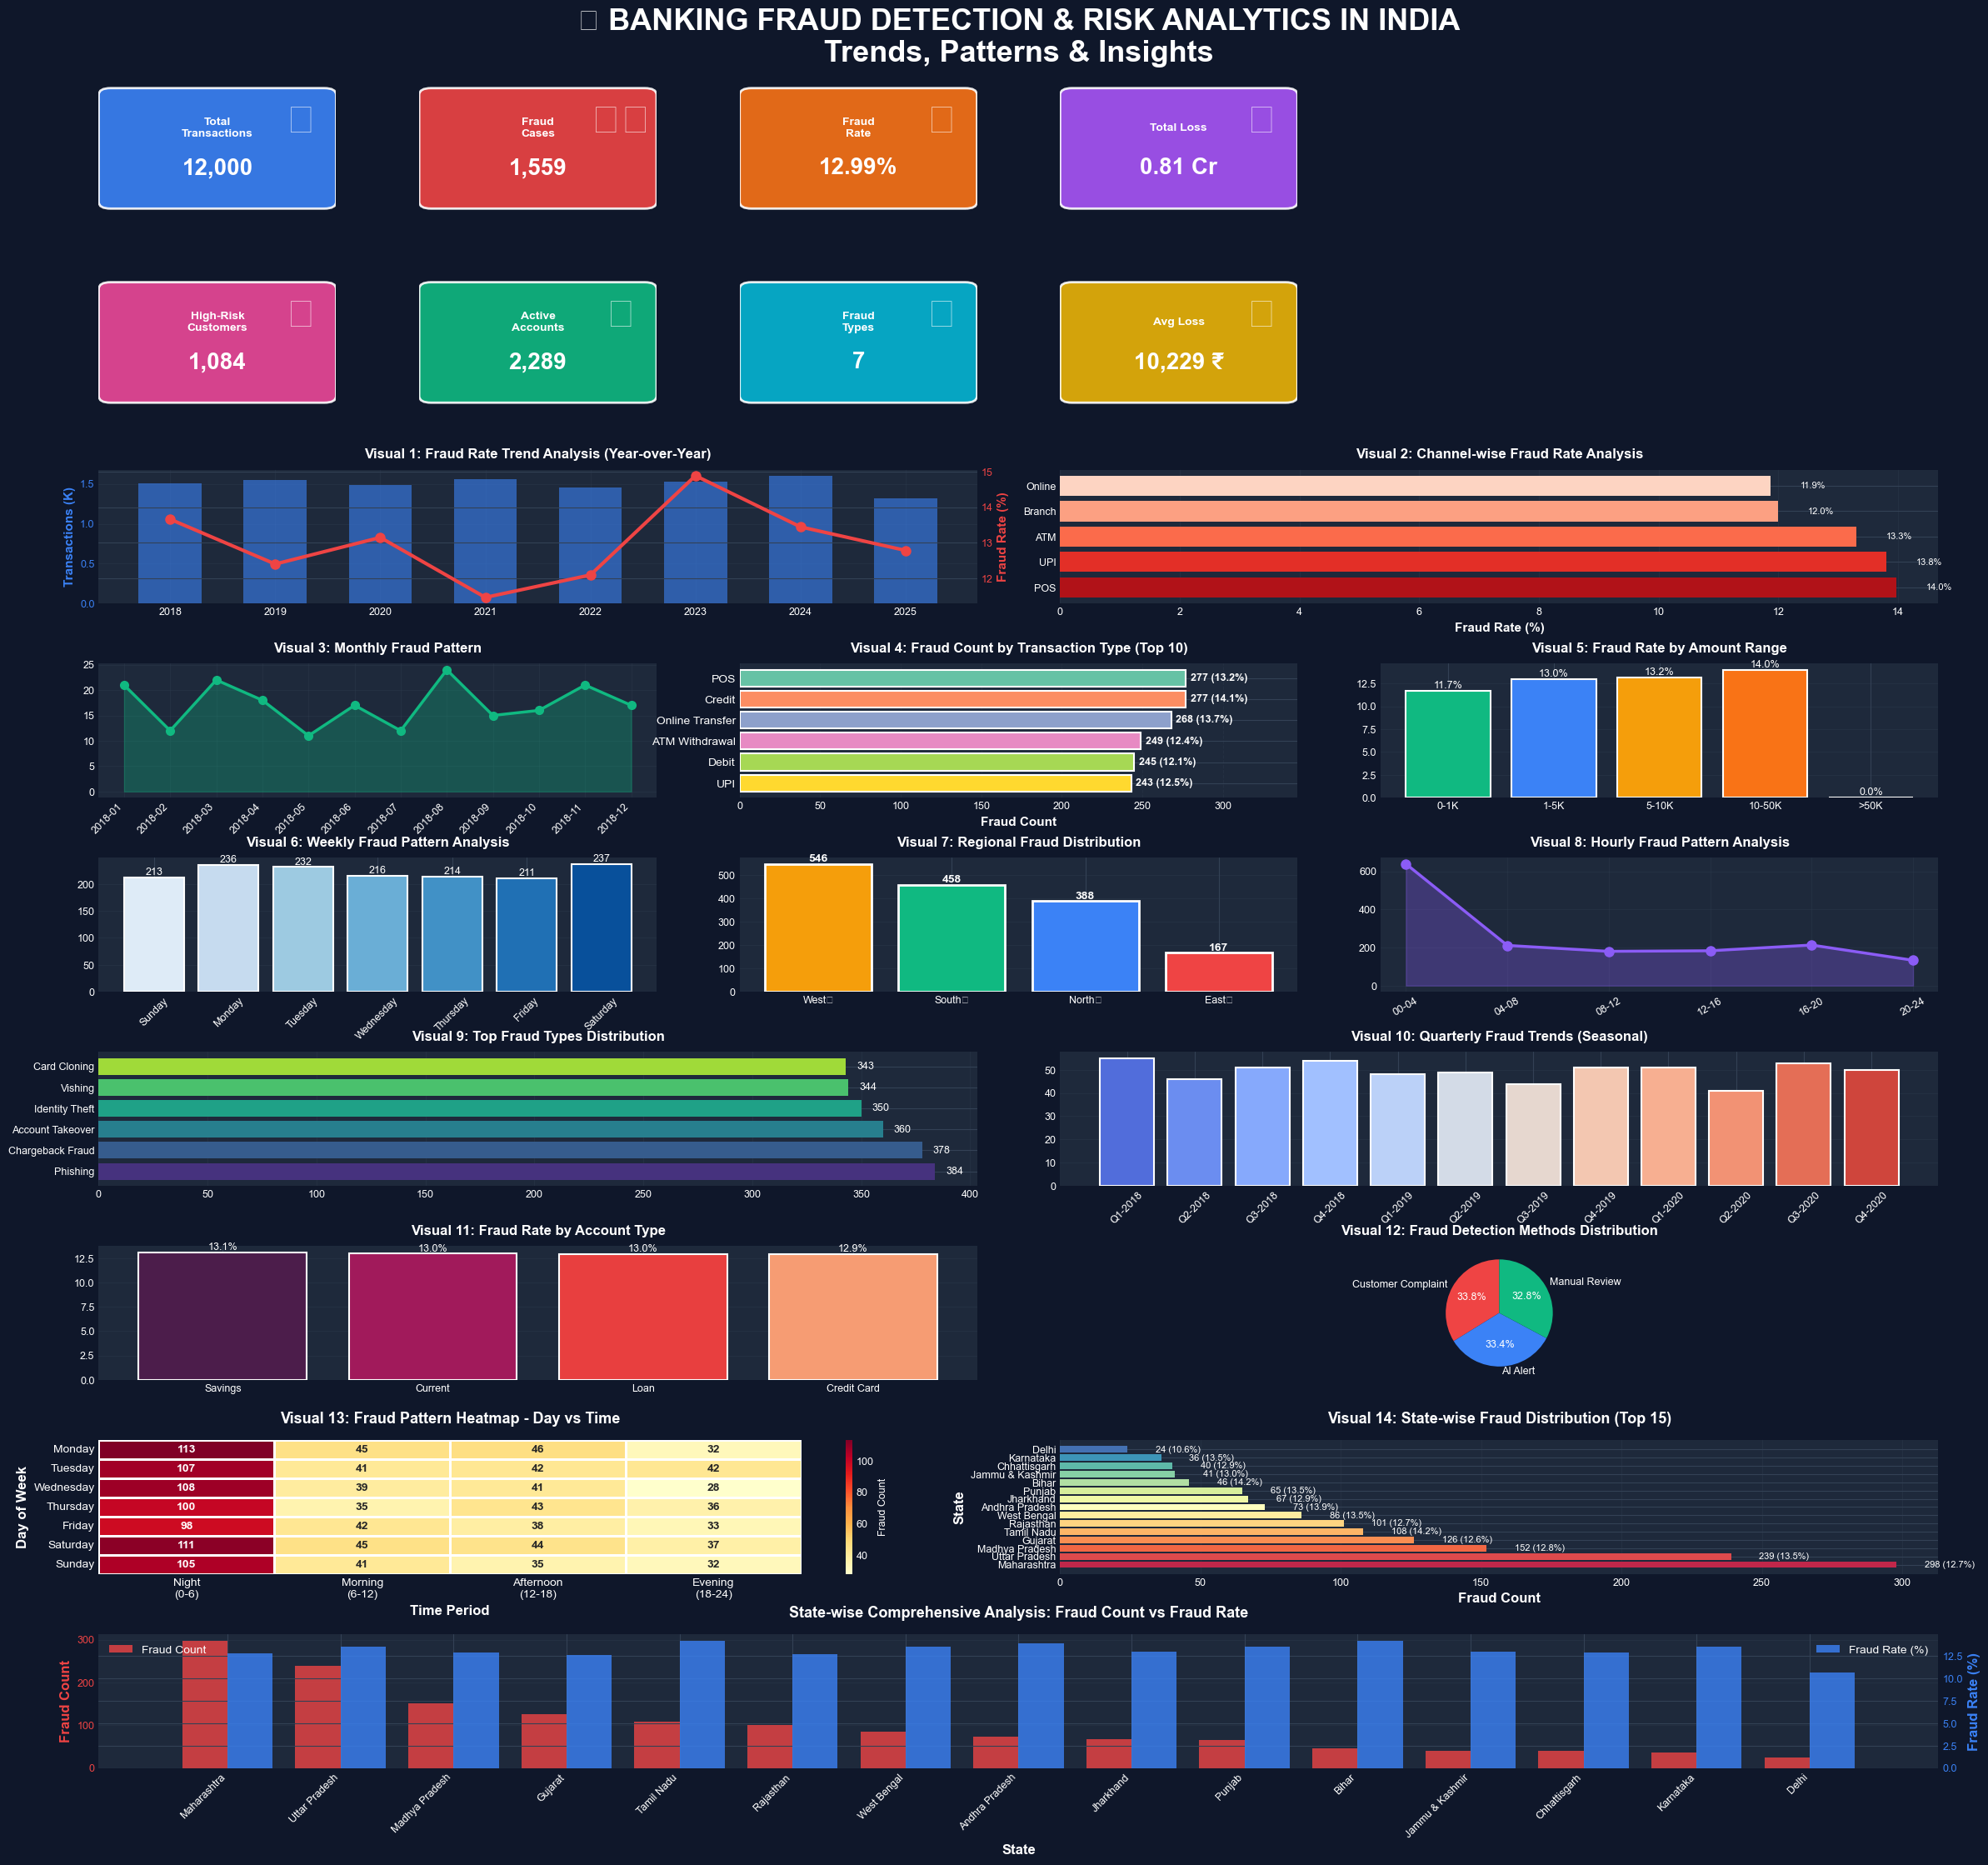


📋 COMPREHENSIVE DASHBOARD SUMMARY

🎯 KEY PERFORMANCE INDICATORS:
   • Total Transactions: 12,000
   • Fraud Cases Detected: 1,559
   • Overall Fraud Rate: 12.99%
   • Total Loss: ₹0.81 Crores
   • High-Risk Customers: 1,084
   • Active Accounts: 2,289
   • Fraud Types Identified: 7
   • Average Loss per Case: ₹10,229.02

📊 VISUALIZATION SUMMARY:
   ✓ Visual 1: Fraud Rate Trend Analysis (Year-over-Year)
   ✓ Visual 2: Channel-wise Fraud Rate Analysis
   ✓ Visual 3: Monthly Fraud Pattern
   ✓ Visual 4: Fraud Distribution by Transaction Type
   ✓ Visual 5: Fraud Rate by Amount Range
   ✓ Visual 6: Weekly Fraud Pattern Analysis
   ✓ Visual 7: Regional Fraud Distribution
   ✓ Visual 8: Hourly Fraud Pattern Analysis
   ✓ Visual 9: Top Fraud Types Distribution
   ✓ Visual 10: Quarterly Fraud Trends (Seasonal)
   ✓ Visual 11: Fraud Rate by Account Type
   ✓ Visual 12: Fraud Detection Methods Distribution
   ✓ Visual 13: Fraud Pattern Heatmap (Day vs Time)
   ✓ Visual 14: State-wise Fraud Dist

In [5]:
"""
Banking Fraud Detection and Risk Analytics Dashboard
Project: Banking Fraud Detection and Risk Analytics in India - Trends, Patterns, Insights
Database: fraud_detection_db (MySQL)
Visualization: Matplotlib & Seaborn with Pandas
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle, FancyBboxPatch
import seaborn as sns
import mysql.connector
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.facecolor'] = '#0f172a'
plt.rcParams['axes.facecolor'] = '#1e293b'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['grid.color'] = '#334155'
plt.rcParams['font.size'] = 9

# ============================================
# DATABASE CONNECTION
# ============================================

def get_database_credentials():
    """Get database credentials from user input"""
    print("\n" + "="*60)
    print("  🔐 MySQL Database Connection Setup")
    print("="*60)
    
    host = input("Enter MySQL Host [localhost]: ").strip() or 'localhost'
    user = input("Enter MySQL Username [root]: ").strip() or 'root'
    
    # Use getpass for secure password input (password won't be visible)
    from getpass import getpass
    password = getpass("Enter MySQL Password: ")
    
    database = input("Enter Database Name [banking_fraud_db]: ").strip() or 'banking_fraud_db'
    
    return {
        'host': host,
        'user': user,
        'password': password,
        'database': database
    }

def connect_to_database(credentials=None):
    """Connect to MySQL database"""
    try:
        if credentials is None:
            connection = mysql.connector.connect(
                host='localhost',
                user='root',
                password='Swathi2025SecurePwd',
                database='banking_fraud_db'
            )
        else:
            connection = mysql.connector.connect(**credentials)
        
        # Disable ONLY_FULL_GROUP_BY mode to avoid SQL errors
        cursor = connection.cursor()
        cursor.execute("SET sql_mode=(SELECT REPLACE(@@sql_mode,'ONLY_FULL_GROUP_BY',''))")
        cursor.close()
        
        print("✅ Successfully connected to banking_fraud_db database!")
        return connection
    except mysql.connector.Error as err:
        print(f"❌ Error: {err}")
        return None

# ============================================
# DATA EXTRACTION FUNCTIONS
# ============================================

def fetch_data(connection, query):
    """Execute query and return DataFrame"""
    return pd.read_sql(query, connection)

def get_kpi_data(connection):
    """Fetch KPI metrics"""
    query = """
    SELECT 
        COUNT(*) as total_transactions,
        SUM(is_fraud) as fraud_cases,
        (SUM(is_fraud) / COUNT(*)) * 100 as fraud_rate,
        SUM(CASE WHEN is_fraud = 1 THEN amount ELSE 0 END) / 10000000 as total_loss_cr
    FROM transaction
    """
    kpi_basic = fetch_data(connection, query).iloc[0]
    
    query = """
    SELECT COUNT(DISTINCT customer_id) as high_risk_customers
    FROM customer
    WHERE risk_score > 0.7
    """
    high_risk = fetch_data(connection, query).iloc[0]['high_risk_customers']
    
    query = """
    SELECT COUNT(*) as active_accounts
    FROM account
    WHERE status = 'Active'
    """
    active_accounts = fetch_data(connection, query).iloc[0]['active_accounts']
    
    query = """
    SELECT COUNT(DISTINCT fraud_type) as fraud_types
    FROM fraud_case
    """
    fraud_types = fetch_data(connection, query).iloc[0]['fraud_types']
    
    query = """
    SELECT AVG(loss_amount) as avg_loss
    FROM fraud_case
    WHERE loss_amount > 0
    """
    avg_loss = fetch_data(connection, query).iloc[0]['avg_loss']
    
    return {
        'total_transactions': int(kpi_basic['total_transactions']),
        'fraud_cases': int(kpi_basic['fraud_cases']),
        'fraud_rate': float(kpi_basic['fraud_rate']),
        'total_loss_cr': float(kpi_basic['total_loss_cr']),
        'high_risk_customers': int(high_risk),
        'active_accounts': int(active_accounts),
        'fraud_types': int(fraud_types),
        'avg_loss': float(avg_loss) if avg_loss else 0
    }

def get_yearly_trend(connection):
    """Get yearly fraud trend"""
    query = """
    SELECT 
        YEAR(transaction_date) as year,
        COUNT(*) / 1000 as transactions_k,
        (SUM(is_fraud) / COUNT(*)) * 100 as fraud_rate
    FROM transaction
    GROUP BY YEAR(transaction_date)
    ORDER BY year
    """
    return fetch_data(connection, query)

def get_channel_fraud(connection):
    """Get channel-wise fraud rate"""
    query = """
    SELECT 
        channel,
        COUNT(*) as total_transactions,
        SUM(is_fraud) as fraud_cases,
        (SUM(is_fraud) / COUNT(*)) * 100 as fraud_rate
    FROM transaction
    GROUP BY channel
    ORDER BY fraud_rate DESC
    """
    return fetch_data(connection, query)

def get_monthly_trend(connection):
    """Get monthly fraud pattern"""
    query = """
    SELECT 
        DATE_FORMAT(transaction_date, '%Y-%m') as month_year,
        MONTH(transaction_date) as month,
        SUM(is_fraud) as fraud_count
    FROM transaction
    GROUP BY DATE_FORMAT(transaction_date, '%Y-%m'), MONTH(transaction_date)
    ORDER BY month_year
    LIMIT 12
    """
    return fetch_data(connection, query)

def get_transaction_types(connection):
    """Get fraud distribution by transaction type - SHOWING ALL TYPES"""
    query = """
    SELECT 
        transaction_type,
        SUM(CASE WHEN is_fraud = 1 THEN 1 ELSE 0 END) as fraud_count,
        COUNT(*) as total_count,
        (SUM(CASE WHEN is_fraud = 1 THEN 1 ELSE 0 END) / COUNT(*)) * 100 as fraud_rate
    FROM transaction
    GROUP BY transaction_type
    ORDER BY fraud_count DESC
    LIMIT 10
    """
    return fetch_data(connection, query)

def get_amount_range(connection):
    """Get fraud rate by amount range"""
    query = """
    SELECT 
        CASE 
            WHEN amount BETWEEN 0 AND 1000 THEN '0-1K'
            WHEN amount BETWEEN 1001 AND 5000 THEN '1-5K'
            WHEN amount BETWEEN 5001 AND 10000 THEN '5-10K'
            WHEN amount BETWEEN 10001 AND 50000 THEN '10-50K'
            ELSE '>50K'
        END as amount_range,
        COUNT(*) as total_transactions,
        (SUM(is_fraud) / COUNT(*)) * 100 as fraud_rate
    FROM transaction
    GROUP BY amount_range
    ORDER BY FIELD(amount_range, '0-1K', '1-5K', '5-10K', '10-50K', '>50K')
    """
    return fetch_data(connection, query)

def get_weekly_pattern(connection):
    """Get weekly fraud pattern"""
    query = """
    SELECT 
        DAYNAME(transaction_date) as day_name,
        DAYOFWEEK(transaction_date) as day_num,
        SUM(is_fraud) as fraud_count
    FROM transaction
    WHERE is_fraud = 1
    GROUP BY DAYNAME(transaction_date), DAYOFWEEK(transaction_date)
    ORDER BY day_num
    """
    return fetch_data(connection, query)

def get_regional_data(connection):
    """Get regional fraud distribution"""
    query = """
    SELECT 
        b.region,
        COUNT(*) as total_transactions,
        SUM(t.is_fraud) as fraud_count
    FROM transaction t
    JOIN account a ON t.account_id = a.account_id
    JOIN branch b ON a.branch_id = b.branch_id
    GROUP BY b.region
    ORDER BY fraud_count DESC
    """
    return fetch_data(connection, query)

def get_hourly_pattern(connection):
    """Get hourly fraud pattern"""
    query = """
    SELECT 
        HOUR(transaction_date) as hour,
        SUM(is_fraud) as fraud_count
    FROM transaction
    WHERE is_fraud = 1
    GROUP BY HOUR(transaction_date)
    ORDER BY hour
    """
    df = fetch_data(connection, query)
    df['time_period'] = pd.cut(df['hour'], 
                               bins=[0, 4, 8, 12, 16, 20, 24],
                               labels=['00-04', '04-08', '08-12', '12-16', '16-20', '20-24'],
                               include_lowest=True)
    hourly_grouped = df.groupby('time_period', observed=True)['fraud_count'].sum().reset_index()
    return hourly_grouped

def get_fraud_types_distribution(connection):
    """Get fraud types distribution"""
    query = """
    SELECT 
        fraud_type,
        COUNT(*) as count,
        SUM(loss_amount) / 10000000 as total_loss_cr
    FROM fraud_case
    GROUP BY fraud_type
    ORDER BY count DESC
    LIMIT 6
    """
    return fetch_data(connection, query)

def get_quarterly_trends(connection):
    """Get quarterly fraud trends"""
    query = """
    SELECT 
        YEAR(transaction_date) as year,
        QUARTER(transaction_date) as quarter,
        SUM(is_fraud) as fraud_count
    FROM transaction
    GROUP BY YEAR(transaction_date), QUARTER(transaction_date)
    ORDER BY year, quarter
    LIMIT 12
    """
    df = fetch_data(connection, query)
    df['quarter_label'] = 'Q' + df['quarter'].astype(str) + '-' + df['year'].astype(str)
    return df

def get_account_type_analysis(connection):
    """Get fraud by account type"""
    query = """
    SELECT 
        a.account_type,
        COUNT(*) as total_transactions,
        SUM(t.is_fraud) as fraud_count,
        (SUM(t.is_fraud) / COUNT(*)) * 100 as fraud_rate
    FROM transaction t
    JOIN account a ON t.account_id = a.account_id
    GROUP BY a.account_type
    ORDER BY fraud_rate DESC
    """
    return fetch_data(connection, query)

def get_detection_methods(connection):
    """Get fraud detection methods"""
    query = """
    SELECT 
        detection_method,
        COUNT(*) as count,
        (COUNT(*) / (SELECT COUNT(*) FROM fraud_case)) * 100 as percentage
    FROM fraud_case
    GROUP BY detection_method
    ORDER BY count DESC
    """
    return fetch_data(connection, query)

def get_fraud_heatmap_data(connection):
    """Get fraud correlation data for heatmap"""
    query = """
    SELECT 
        DAYNAME(t.transaction_date) as day_of_week,
        DAYOFWEEK(t.transaction_date) as day_num,
        HOUR(t.transaction_date) as hour,
        COUNT(*) as fraud_count
    FROM transaction t
    WHERE t.is_fraud = 1
    GROUP BY DAYNAME(t.transaction_date), DAYOFWEEK(t.transaction_date), HOUR(t.transaction_date)
    ORDER BY day_num, hour
    """
    df = fetch_data(connection, query)
    df['time_period'] = pd.cut(df['hour'], 
                               bins=[0, 6, 12, 18, 24],
                               labels=['Night\n(0-6)', 'Morning\n(6-12)', 'Afternoon\n(12-18)', 'Evening\n(18-24)'],
                               include_lowest=True)
    heatmap_data = df.groupby(['day_of_week', 'day_num', 'time_period'], observed=True)['fraud_count'].sum().reset_index()
    heatmap_pivot = heatmap_data.pivot(index='day_of_week', columns='time_period', values='fraud_count').fillna(0)
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    heatmap_pivot = heatmap_pivot.reindex([day for day in day_order if day in heatmap_pivot.index])
    return heatmap_pivot

def get_state_wise_fraud(connection):
    """Get state-wise fraud distribution"""
    query = """
    SELECT 
        c.state,
        COUNT(*) as total_transactions,
        SUM(t.is_fraud) as fraud_count,
        (SUM(t.is_fraud) / COUNT(*)) * 100 as fraud_rate,
        SUM(CASE WHEN t.is_fraud = 1 THEN t.amount ELSE 0 END) / 10000000 as loss_cr
    FROM transaction t
    JOIN account a ON t.account_id = a.account_id
    JOIN customer c ON a.customer_id = c.customer_id
    WHERE c.state IS NOT NULL AND c.state != ''
    GROUP BY c.state
    ORDER BY fraud_count DESC
    LIMIT 15
    """
    return fetch_data(connection, query)

# ============================================
# VISUALIZATION FUNCTIONS
# ============================================

def create_kpi_card(ax, title, value, icon, color, suffix=''):
    """Create a single KPI card"""
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    
    card = FancyBboxPatch((0.05, 0.1), 0.9, 0.8, 
                          boxstyle="round,pad=0.05", 
                          facecolor=color, 
                          edgecolor='white', 
                          linewidth=2,
                          alpha=0.9,
                          zorder=1)
    ax.add_patch(card)
    
    ax.text(0.85, 0.7, icon, fontsize=35, ha='center', va='center', 
            color='white', alpha=0.7, zorder=3)
    
    ax.text(0.5, 0.65, title, fontsize=10, ha='center', va='center', 
            color='white', weight='bold', wrap=True, zorder=3)
    
    if isinstance(value, float):
        if value < 100:
            value_text = f"{value:.2f}{suffix}"
        else:
            value_text = f"{value:,.0f}{suffix}"
    else:
        value_text = f"{value:,}{suffix}"
    
    ax.text(0.5, 0.35, value_text, fontsize=20, ha='center', va='center', 
            color='white', weight='bold', zorder=3)

def create_dashboard(kpi_data, yearly_df, channel_df, monthly_df, transaction_df, 
                     amount_df, weekly_df, regional_df, hourly_df, fraud_types_df,
                     quarterly_df, account_type_df, detection_df, heatmap_data, state_df):
    """Create comprehensive dashboard with all 8 KPIs properly displayed"""
    
    fig = plt.figure(figsize=(24, 22))
    fig.suptitle('🏦 BANKING FRAUD DETECTION & RISK ANALYTICS IN INDIA\nTrends, Patterns & Insights', 
                 fontsize=26, fontweight='bold', color='white', y=0.98)
    
    gs = fig.add_gridspec(9, 6, hspace=0.45, wspace=0.35, 
                          left=0.04, right=0.96, top=0.94, bottom=0.02)
    
    # ============================================
    # KPI CARDS - FIXED LAYOUT (Row 0 & Row 1)
    # ============================================
    kpi_configs = [
        ('Total\nTransactions', kpi_data['total_transactions'], '📊', '#3b82f6', ''),
        ('Fraud\nCases', kpi_data['fraud_cases'], '⚠️', '#ef4444', ''),
        ('Fraud\nRate', kpi_data['fraud_rate'], '📈', '#f97316', '%'),
        ('Total Loss', kpi_data['total_loss_cr'], '💰', '#a855f7', ' Cr'),
        ('High-Risk\nCustomers', kpi_data['high_risk_customers'], '👥', '#ec4899', ''),
        ('Active\nAccounts', kpi_data['active_accounts'], '🔐', '#10b981', ''),
        ('Fraud\nTypes', kpi_data['fraud_types'], '📋', '#06b6d4', ''),
        ('Avg Loss', kpi_data['avg_loss'], '💸', '#eab308', ' ₹'),
    ]
    
    # ROW 0: First 4 KPIs (columns 0-3)
    for i in range(4):
        ax = fig.add_subplot(gs[0, i:i+1])
        title, value, icon, color, suffix = kpi_configs[i]
        create_kpi_card(ax, title, value, icon, color, suffix)
    
    # ROW 1: Next 4 KPIs (columns 0-3)
    for i in range(4, 8):
        ax = fig.add_subplot(gs[1, i-4:i-3])
        title, value, icon, color, suffix = kpi_configs[i]
        create_kpi_card(ax, title, value, icon, color, suffix)
    
    # ============================================
    # ROW 2: Visual 1 & 2
    # ============================================
    ax1 = fig.add_subplot(gs[2, :3])
    ax2 = ax1.twinx()
    bars = ax1.bar(yearly_df['year'].astype(str), yearly_df['transactions_k'], 
                   color='#3b82f6', alpha=0.6, width=0.6)
    ax1.set_ylabel('Transactions (K)', fontsize=11, fontweight='bold', color='#3b82f6')
    ax1.tick_params(axis='y', labelcolor='#3b82f6')
    line = ax2.plot(yearly_df['year'].astype(str), yearly_df['fraud_rate'], 
                    color='#ef4444', marker='o', linewidth=3, markersize=8)
    ax2.set_ylabel('Fraud Rate (%)', fontsize=11, fontweight='bold', color='#ef4444')
    ax2.tick_params(axis='y', labelcolor='#ef4444')
    ax1.set_title('Visual 1: Fraud Rate Trend Analysis (Year-over-Year)', 
                  fontsize=12, fontweight='bold', pad=10)
    ax1.grid(True, alpha=0.3)
    
    ax3 = fig.add_subplot(gs[2, 3:])
    bars = ax3.barh(channel_df['channel'], channel_df['fraud_rate'], 
                    color=sns.color_palette('Reds_r', len(channel_df)))
    ax3.set_xlabel('Fraud Rate (%)', fontsize=11, fontweight='bold')
    ax3.set_title('Visual 2: Channel-wise Fraud Rate Analysis', 
                  fontsize=12, fontweight='bold', pad=10)
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax3.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{width:.1f}%', ha='left', va='center', fontsize=8)
    ax3.grid(axis='x', alpha=0.3)
    
    # ============================================
    # ROW 3: Visual 3, 4, 5
    # ============================================
    ax4 = fig.add_subplot(gs[3, :2])
    ax4.plot(range(len(monthly_df)), monthly_df['fraud_count'], 
             marker='o', linewidth=2.5, markersize=7, color='#10b981')
    ax4.fill_between(range(len(monthly_df)), monthly_df['fraud_count'], alpha=0.3, color='#10b981')
    ax4.set_title('Visual 3: Monthly Fraud Pattern', fontsize=12, fontweight='bold', pad=10)
    ax4.set_xticks(range(len(monthly_df)))
    ax4.set_xticklabels(monthly_df['month_year'], rotation=45, ha='right')
    ax4.grid(True, alpha=0.3)
    
    ax5 = fig.add_subplot(gs[3, 2:4])
    colors = sns.color_palette('Set2', len(transaction_df))
    bars = ax5.barh(range(len(transaction_df)), 
                    transaction_df['fraud_count'],
                    color=colors,
                    edgecolor='white',
                    linewidth=1.5)
    ax5.set_yticks(range(len(transaction_df)))
    ax5.set_yticklabels(transaction_df['transaction_type'], fontsize=10)
    ax5.set_xlabel('Fraud Count', fontsize=11, fontweight='bold')
    ax5.set_title('Visual 4: Fraud Count by Transaction Type (Top 10)', 
                  fontsize=12, fontweight='bold', pad=10)
    for i, (bar, row) in enumerate(zip(bars, transaction_df.itertuples())):
        width = bar.get_width()
        ax5.text(width + max(transaction_df['fraud_count'])*0.01, 
                bar.get_y() + bar.get_height()/2,
                f'{int(width)} ({row.fraud_rate:.1f}%)', 
                ha='left', va='center', fontsize=9, fontweight='bold', color='white')
    ax5.grid(axis='x', alpha=0.3, linestyle='--')
    ax5.set_xlim(0, transaction_df['fraud_count'].max() * 1.25)
    ax5.invert_yaxis()
    
    ax6 = fig.add_subplot(gs[3, 4:])
    colors_range = ['#10b981', '#3b82f6', '#f59e0b', '#f97316', '#ef4444']
    bars = ax6.bar(amount_df['amount_range'], amount_df['fraud_rate'], 
                   color=colors_range, edgecolor='white', linewidth=1.5)
    ax6.set_title('Visual 5: Fraud Rate by Amount Range', fontsize=12, fontweight='bold', pad=10)
    for bar in bars:
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9)
    ax6.grid(axis='y', alpha=0.3)
    
    # ============================================
    # ROW 4: Visual 6, 7, 8
    # ============================================
    ax7 = fig.add_subplot(gs[4, :2])
    bars = ax7.bar(weekly_df['day_name'], weekly_df['fraud_count'],
                   color=sns.color_palette('Blues', len(weekly_df)), edgecolor='white', linewidth=1.5)
    ax7.set_title('Visual 6: Weekly Fraud Pattern Analysis', fontsize=12, fontweight='bold', pad=10)
    for bar in bars:
        height = bar.get_height()
        ax7.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)
    ax7.tick_params(axis='x', rotation=45)
    ax7.grid(axis='y', alpha=0.3)
    
    ax8 = fig.add_subplot(gs[4, 2:4])
    colors_region = ['#f59e0b', '#10b981', '#3b82f6', '#ef4444']
    bars = ax8.bar(regional_df['region'], regional_df['fraud_count'],
                   color=colors_region[:len(regional_df)], edgecolor='white', linewidth=2)
    ax8.set_title('Visual 7: Regional Fraud Distribution', fontsize=12, fontweight='bold', pad=10)
    for bar in bars:
        height = bar.get_height()
        ax8.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    ax8.grid(axis='y', alpha=0.3)
    
    ax9 = fig.add_subplot(gs[4, 4:])
    ax9.plot(hourly_df['time_period'], hourly_df['fraud_count'], 
             marker='o', linewidth=2.5, markersize=8, color='#8b5cf6')
    ax9.fill_between(range(len(hourly_df)), hourly_df['fraud_count'], alpha=0.3, color='#8b5cf6')
    ax9.set_title('Visual 8: Hourly Fraud Pattern Analysis', fontsize=12, fontweight='bold', pad=10)
    ax9.grid(True, alpha=0.3)
    ax9.tick_params(axis='x', rotation=30)
    
    # ============================================
    # ROW 5: Visual 9, 10
    # ============================================
    ax10 = fig.add_subplot(gs[5, :3])
    bars = ax10.barh(fraud_types_df['fraud_type'], fraud_types_df['count'],
                     color=sns.color_palette('viridis', len(fraud_types_df)))
    ax10.set_title('Visual 9: Top Fraud Types Distribution', fontsize=12, fontweight='bold', pad=10)
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax10.text(width + 5, bar.get_y() + bar.get_height()/2,
                 f'{int(width)}', ha='left', va='center', fontsize=9)
    ax10.grid(axis='x', alpha=0.3)
    
    ax11 = fig.add_subplot(gs[5, 3:])
    bars = ax11.bar(quarterly_df['quarter_label'], quarterly_df['fraud_count'],
                    color=sns.color_palette('coolwarm', len(quarterly_df)), edgecolor='white', linewidth=1.5)
    ax11.set_title('Visual 10: Quarterly Fraud Trends (Seasonal)', fontsize=12, fontweight='bold', pad=10)
    ax11.tick_params(axis='x', rotation=45)
    ax11.grid(axis='y', alpha=0.3)
    
    # ============================================
    # ROW 6: Visual 11, 12
    # ============================================
    ax12 = fig.add_subplot(gs[6, :3])
    bars = ax12.bar(account_type_df['account_type'], account_type_df['fraud_rate'],
                    color=sns.color_palette('rocket', len(account_type_df)), edgecolor='white', linewidth=1.5)
    ax12.set_title('Visual 11: Fraud Rate by Account Type', fontsize=12, fontweight='bold', pad=10)
    for bar in bars:
        height = bar.get_height()
        ax12.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.1f}%', ha='center', va='bottom', fontsize=9)
    ax12.grid(axis='y', alpha=0.3)
    
    ax13 = fig.add_subplot(gs[6, 3:])
    colors_detection = ['#ef4444', '#3b82f6', '#10b981', '#f59e0b']
    wedges, texts, autotexts = ax13.pie(detection_df['percentage'], 
                                         labels=detection_df['detection_method'],
                                         autopct='%1.1f%%', colors=colors_detection[:len(detection_df)],
                                         startangle=90, textprops={'fontsize': 9, 'color': 'white'})
    ax13.set_title('Visual 12: Fraud Detection Methods Distribution', 
                   fontsize=12, fontweight='bold', pad=10)
    
    # ============================================
    # ROW 7: Visual 13 (Heatmap) & Visual 14 (State-wise)
    # ============================================
    ax14 = fig.add_subplot(gs[7, :3])
    sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', 
                cbar_kws={'label': 'Fraud Count'}, linewidths=1, linecolor='white',
                ax=ax14, annot_kws={'fontsize': 10, 'weight': 'bold'})
    ax14.set_xlabel('Time Period', fontsize=12, fontweight='bold', color='white')
    ax14.set_ylabel('Day of Week', fontsize=12, fontweight='bold', color='white')
    ax14.set_title('Visual 13: Fraud Pattern Heatmap - Day vs Time', 
                   fontsize=13, fontweight='bold', pad=15, color='white')
    ax14.set_facecolor('#1e293b')
    ax14.tick_params(colors='white', labelsize=10)
    ax14.set_xticklabels(ax14.get_xticklabels(), rotation=0, ha='center')
    ax14.set_yticklabels(ax14.get_yticklabels(), rotation=0)
    
    ax15 = fig.add_subplot(gs[7, 3:])
    bars = ax15.barh(state_df['state'], state_df['fraud_count'],
                     color=sns.color_palette('Spectral', len(state_df)))
    ax15.set_xlabel('Fraud Count', fontsize=12, fontweight='bold')
    ax15.set_ylabel('State', fontsize=12, fontweight='bold')
    ax15.set_title('Visual 14: State-wise Fraud Distribution (Top 15)', 
                   fontsize=13, fontweight='bold', pad=15, color='white')
    for i, bar in enumerate(bars):
        width = bar.get_width()
        fraud_rate = state_df.iloc[i]['fraud_rate']
        ax15.text(width + 10, bar.get_y() + bar.get_height()/2,
                 f'{int(width)} ({fraud_rate:.1f}%)', 
                 ha='left', va='center', fontsize=8, color='white')
    ax15.grid(axis='x', alpha=0.3)
    ax15.tick_params(axis='y', labelsize=9)
    
    # ============================================
    # ROW 8: State-wise Detailed Comparison
    # ============================================
    ax16 = fig.add_subplot(gs[8, :])
    x_pos = np.arange(len(state_df))
    ax16_2 = ax16.twinx()
    
    bars1 = ax16.bar(x_pos - 0.2, state_df['fraud_count'], 0.4,
                     label='Fraud Count', color='#ef4444', alpha=0.8)
    bars2 = ax16_2.bar(x_pos + 0.2, state_df['fraud_rate'], 0.4,
                      label='Fraud Rate (%)', color='#3b82f6', alpha=0.8)
    
    ax16.set_xlabel('State', fontsize=12, fontweight='bold')
    ax16.set_ylabel('Fraud Count', fontsize=12, fontweight='bold', color='#ef4444')
    ax16_2.set_ylabel('Fraud Rate (%)', fontsize=12, fontweight='bold', color='#3b82f6')
    ax16.set_title('State-wise Comprehensive Analysis: Fraud Count vs Fraud Rate', 
                   fontsize=13, fontweight='bold', pad=15, color='white')
    ax16.set_xticks(x_pos)
    ax16.set_xticklabels(state_df['state'], rotation=45, ha='right', fontsize=9)
    ax16.tick_params(axis='y', labelcolor='#ef4444')
    ax16_2.tick_params(axis='y', labelcolor='#3b82f6')
    ax16.legend(loc='upper left', fontsize=10)
    ax16_2.legend(loc='upper right', fontsize=10)
    ax16.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    return fig

# ============================================
# MAIN EXECUTION
# ============================================

if __name__ == "__main__":
    print("=" * 90)
    print(" " * 20 + "🏦 BANKING FRAUD DETECTION DASHBOARD 🏦")
    print(" " * 15 + "Banking Fraud Detection and Risk Analytics in India")
    print(" " * 25 + "Trends, Patterns & Insights")
    print("=" * 90)
    print()
    
    # Get database credentials from user
    credentials = get_database_credentials()
    
    print("\n🔌 Connecting to MySQL database...")
    conn = connect_to_database(credentials)
    
    if conn:
        try:
            print("📊 Fetching data from database...")
            
            # Fetch all data for KPIs and Visuals
            kpi_data = get_kpi_data(conn)
            yearly_df = get_yearly_trend(conn)
            channel_df = get_channel_fraud(conn)
            monthly_df = get_monthly_trend(conn)
            transaction_df = get_transaction_types(conn)
            amount_df = get_amount_range(conn)
            weekly_df = get_weekly_pattern(conn)
            regional_df = get_regional_data(conn)
            hourly_df = get_hourly_pattern(conn)
            fraud_types_df = get_fraud_types_distribution(conn)
            quarterly_df = get_quarterly_trends(conn)
            account_type_df = get_account_type_analysis(conn)
            detection_df = get_detection_methods(conn)
            heatmap_data = get_fraud_heatmap_data(conn)
            state_df = get_state_wise_fraud(conn)
            
            print("✅ Data fetched successfully!")
            print()
            print("📈 Generating comprehensive dashboard with 8 KPIs + 14 Visualizations...")
            print("   ✓ ALL 8 KPIs NOW PROPERLY DISPLAYED IN 2 ROWS!")
            
            # Create comprehensive dashboard
            fig = create_dashboard(kpi_data, yearly_df, channel_df, monthly_df, 
                                 transaction_df, amount_df, weekly_df, regional_df,
                                 hourly_df, fraud_types_df, quarterly_df, 
                                 account_type_df, detection_df, heatmap_data, state_df)
            
            # Save dashboard
            plt.savefig('banking_fraud_dashboard_complete.png', dpi=300, bbox_inches='tight', 
                       facecolor='#0f172a')
            print("✅ Dashboard saved as 'banking_fraud_dashboard_complete.png'")
            
            # Show dashboard
            plt.show()
            
            # Print comprehensive summary
            print()
            print("=" * 90)
            print("📋 COMPREHENSIVE DASHBOARD SUMMARY")
            print("=" * 90)
            print("\n🎯 KEY PERFORMANCE INDICATORS:")
            print(f"   • Total Transactions: {kpi_data['total_transactions']:,}")
            print(f"   • Fraud Cases Detected: {kpi_data['fraud_cases']:,}")
            print(f"   • Overall Fraud Rate: {kpi_data['fraud_rate']:.2f}%")
            print(f"   • Total Loss: ₹{kpi_data['total_loss_cr']:.2f} Crores")
            print(f"   • High-Risk Customers: {kpi_data['high_risk_customers']:,}")
            print(f"   • Active Accounts: {kpi_data['active_accounts']:,}")
            print(f"   • Fraud Types Identified: {kpi_data['fraud_types']}")
            print(f"   • Average Loss per Case: ₹{kpi_data['avg_loss']:,.2f}")
            
            print("\n📊 VISUALIZATION SUMMARY:")
            print("   ✓ Visual 1: Fraud Rate Trend Analysis (Year-over-Year)")
            print("   ✓ Visual 2: Channel-wise Fraud Rate Analysis")
            print("   ✓ Visual 3: Monthly Fraud Pattern")
            print("   ✓ Visual 4: Fraud Distribution by Transaction Type")
            print("   ✓ Visual 5: Fraud Rate by Amount Range")
            print("   ✓ Visual 6: Weekly Fraud Pattern Analysis")
            print("   ✓ Visual 7: Regional Fraud Distribution")
            print("   ✓ Visual 8: Hourly Fraud Pattern Analysis")
            print("   ✓ Visual 9: Top Fraud Types Distribution")
            print("   ✓ Visual 10: Quarterly Fraud Trends (Seasonal)")
            print("   ✓ Visual 11: Fraud Rate by Account Type")
            print("   ✓ Visual 12: Fraud Detection Methods Distribution")
            print("   ✓ Visual 13: Fraud Pattern Heatmap (Day vs Time)")
            print("   ✓ Visual 14: State-wise Fraud Distribution (Top 15)")
            print("   ✓ BONUS: State-wise Fraud Count vs Rate Comparison")
            
            print("\n📈 KEY INSIGHTS:")
            print(f"   • Highest Risk Channel: {channel_df.iloc[0]['channel']} ({channel_df.iloc[0]['fraud_rate']:.2f}%)")
            print(f"   • Highest Risk Region: {regional_df.iloc[0]['region']} ({regional_df.iloc[0]['fraud_count']} cases)")
            print(f"   • Highest Risk State: {state_df.iloc[0]['state']} ({state_df.iloc[0]['fraud_count']} cases, {state_df.iloc[0]['fraud_rate']:.2f}%)")
            print(f"   • Peak Fraud Day: {weekly_df.loc[weekly_df['fraud_count'].idxmax(), 'day_name']} ({weekly_df['fraud_count'].max()} cases)")
            print(f"   • Most Common Fraud Type: {fraud_types_df.iloc[0]['fraud_type']} ({fraud_types_df.iloc[0]['count']} cases)")
            print(f"   • Average Monthly Frauds: {monthly_df['fraud_count'].mean():.0f} cases")
            print(f"   • Total Loss from Top 15 States: ₹{state_df['loss_cr'].sum():.2f} Crores")
            
            print("\n🗺️  TOP 5 STATES BY FRAUD:")
            for i in range(min(5, len(state_df))):
                state = state_df.iloc[i]
                print(f"   {i+1}. {state['state']}: {int(state['fraud_count'])} cases ({state['fraud_rate']:.2f}%) - Loss: ₹{state['loss_cr']:.2f} Cr")
            
            print("=" * 90)
            
        except Exception as e:
            print(f"❌ Error during execution: {e}")
            import traceback
            traceback.print_exc()
        
        finally:
            conn.close()
            print("\n🔌 Database connection closed.")
    else:
        print("❌ Failed to connect to database. Please check your credentials.")
        print("\n💡 SETUP INSTRUCTIONS:")
        print("   1. Update the database credentials in the connect_to_database() function")
        print("   2. Ensure MySQL server is running")
        print("   3. Verify the database 'fraud_detection_db' exists")
        print("   4. Check that all tables are populated with data")
    
    print()
    print("✅ Dashboard generation complete!")
    print("=" * 90)